In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [16]:
df_new = pd.read_csv("Vodaphone_review_dataset.csv")

df_new.head()

,Rating,Review,Name,Location,Date,Clean_Review,Sentiment,Sentiment Label,Churn_Keyword,Churn,Review_Date,Review_Time,Weekday,Month,Review_Length,Word_Count
0,1,"Trying to buy broadband through Uswitch, then ...",Alfie Calas,GB,2025-06-05 22:03:24+00:00,trying to buy broadband through uswitch then h...,-0.020000,neutral,1,1,2025-06-05,22:03:24,Thursday,June,280,48
1,5,Sona did a great job either my trade in and co...,Julliette,GB,2025-06-05 21:51:17+00:00,sona did a great job either my trade in and co...,0.700000,positive,0,0,2025-06-05,21:51:17,Thursday,June,68,13
2,1,"One of the worst , if not the worst when it co...",Vlad Ureche,GB,2025-06-05 21:28:36+00:00,one of the worst if not the worst when it come...,-0.200000,neutral,0,1,2025-06-05,21:28:36,Thursday,June,154,34
3,1,How those people get 4.6 rate that’s a joke my...,Adam Farbotko,GB,2025-06-05 21:14:08+00:00,how those people get rate thats a joke my full...,0.275000,positive,0,1,2025-06-05,21:14:08,Thursday,June,240,44
4,1,Held to ransom by a ‘reputable’ company. Purch...,Chloe,GB,2025-06-05 20:24:59+00:00,held to ransom by a reputable company purchase...,-0.003634,neutral,1,1,2025-06-05,20:24:59,Thursday,June,1620,320


In [17]:
df_new.columns

Index(['Rating', 'Review', 'Name', 'Location', 'Date', 'Clean_Review',
       'Sentiment', 'Sentiment Label', 'Churn_Keyword', 'Churn', 'Review_Date',
       'Review_Time', 'Weekday', 'Month', 'Review_Length', 'Word_Count'],
      dtype='object')

In [18]:
df_new = df_new.drop(columns=['Sentiment', 'Sentiment Label', 'Churn_Keyword', 'Review',  'Review_Length', 'Word_Count'])

df_new.head()

,Rating,Name,Location,Date,Clean_Review,Churn,Review_Date,Review_Time,Weekday,Month
0,1,Alfie Calas,GB,2025-06-05 22:03:24+00:00,trying to buy broadband through uswitch then h...,1,2025-06-05,22:03:24,Thursday,June
1,5,Julliette,GB,2025-06-05 21:51:17+00:00,sona did a great job either my trade in and co...,0,2025-06-05,21:51:17,Thursday,June
2,1,Vlad Ureche,GB,2025-06-05 21:28:36+00:00,one of the worst if not the worst when it come...,1,2025-06-05,21:28:36,Thursday,June
3,1,Adam Farbotko,GB,2025-06-05 21:14:08+00:00,how those people get rate thats a joke my full...,1,2025-06-05,21:14:08,Thursday,June
4,1,Chloe,GB,2025-06-05 20:24:59+00:00,held to ransom by a reputable company purchase...,1,2025-06-05,20:24:59,Thursday,June


In [19]:
df_new.columns

Index(['Rating', 'Name', 'Location', 'Date', 'Clean_Review', 'Churn',
       'Review_Date', 'Review_Time', 'Weekday', 'Month'],
      dtype='object')

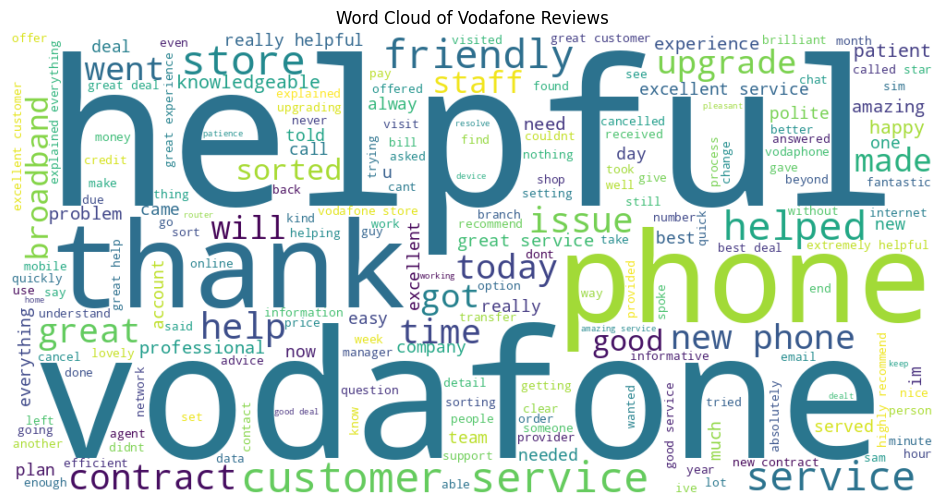

In [21]:
# Combine all text reviews into one string
all_reviews = " ".join(df_new['Clean_Review'].dropna())

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Vodafone Reviews')
plt.show()